In [2]:
import matplotlib.pyplot as plt


In [3]:
#packages
import pandas as pd
import csv
#setting up the data
years = ["2019","2020"]
months_2018 = ["03","04","05","06","07","08","09","10","11","12"]
months_2019 = ["01","02","03","04","05","06","07","08","09","10","11","12"]
months_2020 = ["01","02","03","04","05"]


df = []
#read through files of all months of each year and append them to df
for j in months_2018:
    df1 = pd.read_csv("2018_"+j+".csv", index_col=None)
    df.append(df1)
for j in months_2019:
    df1 = pd.read_csv("2019_"+j+".csv", index_col=None)
    df.append(df1)
for j in months_2020:
    df1 = pd.read_csv("2020_"+j+".csv", index_col=None)
    df.append(df1)



In [48]:
#turn df1 into a dataframe (df2)
df2 = pd.DataFrame()
for i in range(len(df)):
    df2 = pd.concat([df2, df[i]])

#make a smaller dataframe for one day to speed things up/find examples
df3 = df2[(df2['date'] == "2018-03-01")]


In [8]:
df2.to_csv("all_trains.csv")

In [58]:
#creating a list of all the routes
#make three separate lists based on dataframe columns: train_id number, first and last stop
train_ids = []
train_ids = df3['train_id'].unique()
origins = []
destinations = []


#use for loop to sort trains (first cell in 3rd column = origin, last cell = destination)
for i in train_ids:
    temp = df3[(df3['train_id'] == i)]
    origins.append(df3[(df3['train_id'] == i)].iloc[0,3])
    destinations.append(df3[(df3['train_id'] == i)].iloc[len(temp)-1,3])

#print all the trains as they appear with first and last stops (842 trains on 3/1/18 alone)
for i in range(len(train_ids)):
    print(f"Train No.: {train_ids[i]}. From: {origins[i]} To: {destinations[i]}")


Train No.: 3805. From: New York Penn Station To: Hamilton
Train No.: 2312. From: Bay Head To: Newark Penn Station
Train No.: A186. From: Philadelphia To: Newark Penn Station
Train No.: A172. From: Philadelphia To: Newark Penn Station
Train No.: 1107. From: Hoboken To: Mahwah
Train No.: 1100. From: Suffern To: Secaucus Lower Lvl
Train No.: A175. From: New York Penn Station To: Trenton
Train No.: 1109. From: Hoboken To: Ramsey Route 17
Train No.: 3834. From: Trenton To: Secaucus Upper Lvl
Train No.: A188. From: Philadelphia To: Newark Penn Station
Train No.: 0813. From: Hoboken To: Mount Arlington
Train No.: 3205. From: New York Penn Station To: Little Silver
Train No.: 0480. From: Bernardsville To: Newark Broad Street
Train No.: 5902. From: Plainfield To: Union
Train No.: 3833. From: New York Penn Station To: Hamilton
Train No.: 6314. From: Summit To: Secaucus Upper Lvl
Train No.: 3202. From: Long Branch To: Secaucus Upper Lvl
Train No.: 0427. From: Hoboken To: Peapack
Train No.: 5155. 

What's your train's route number?6227


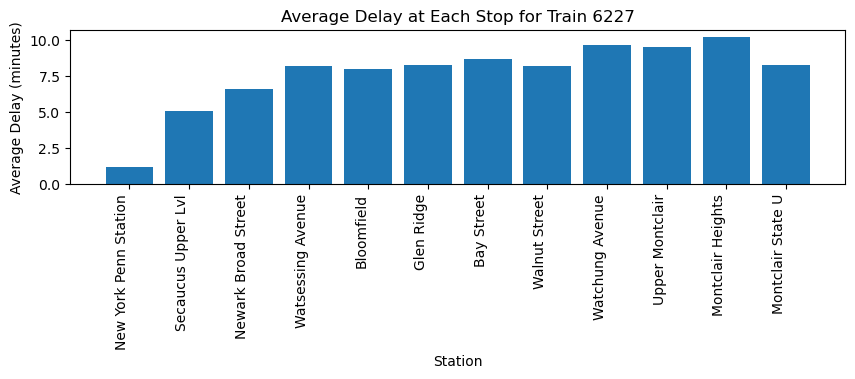

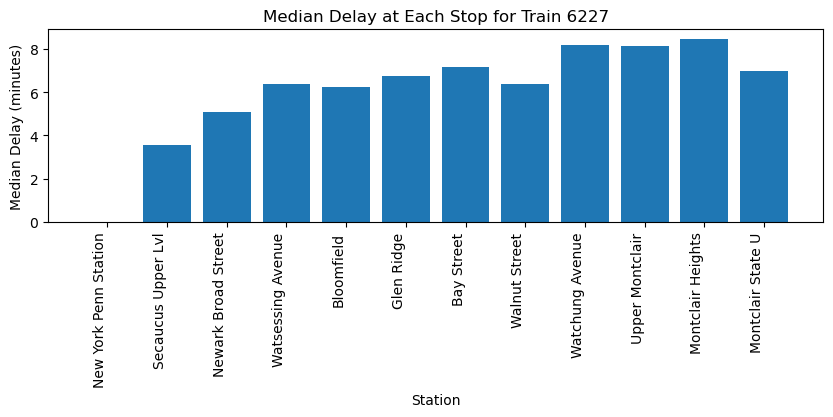

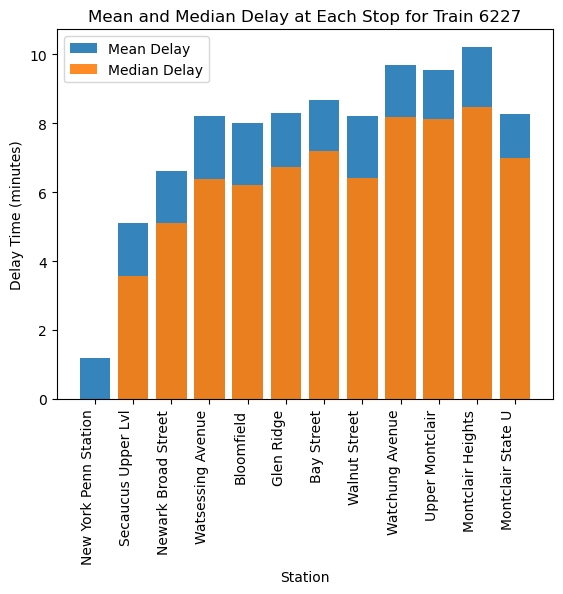

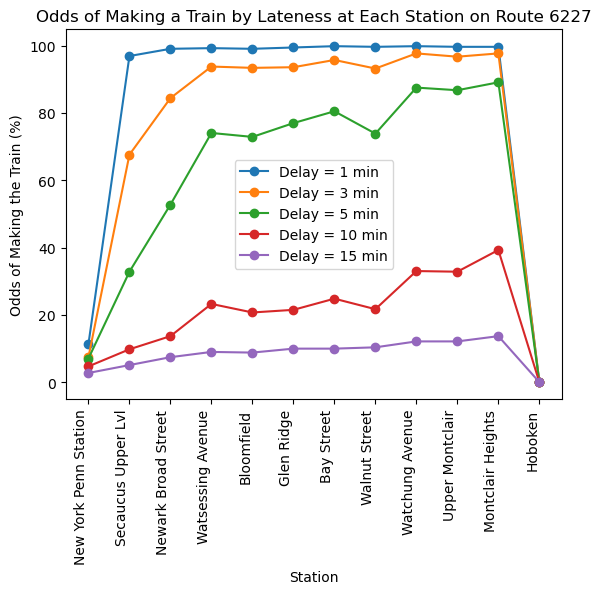

In [59]:
import pandas as pd

#make a new dataframe that isolates one route
train_id = input("What's your train's route number?")
filtered_df = df2[df2['train_id'] == train_id]
#sort it by station
grouped_df = filtered_df.groupby('stop_sequence')

#take the average of each station's total delays
average_delays = grouped_df['delay_minutes'].mean()

#set up bar graph showing mean
plt.figure(figsize=(10,2))
plt.bar(average_delays.index, average_delays)
plt.xlabel('Station')
plt.xticks(average_delays.index, filtered_df.groupby('stop_sequence')['to'].first(), rotation=90, ha='right')
plt.ylabel('Average Delay (minutes)')
plt.title(f'Average Delay at Each Stop for Train {train_id}')
plt.show()

#makea median with the same grouped dataframe
median_delays = grouped_df['delay_minutes'].median()

#median graph
plt.figure(figsize=(10,2.5))

plt.bar(median_delays.index, median_delays)
plt.xlabel('Station')
plt.xticks(median_delays.index, filtered_df.groupby('stop_sequence')['to'].first(), rotation=90, ha='right')
plt.ylabel('Median Delay (minutes)')
plt.title(f'Median Delay at Each Stop for Train {train_id}')
plt.show()


#overlay the plots
plt.bar(average_delays.index, average_delays, alpha = .9, label='Mean Delay')
plt.xlabel('Station')
plt.bar(median_delays.index, median_delays, alpha = .9, label='Median Delay')
plt.xlabel('Station')
plt.xticks(median_delays.index, filtered_df.groupby('stop_sequence')['to'].first(), rotation=90, ha='right')
plt.ylabel('Delay Time (minutes)')
plt.title(f'Mean and Median Delay at Each Stop for Train {train_id}')
plt.legend()
plt.show()

#make a dataframe correpesponding to one train route
train_frame1 = (df2[(df2['train_id'] == train_id)])

#find the stations and set delay intervals
stations = train_frame1['from'].unique()
delay_times = [1, 3, 5, 10, 15]  
#make another dataframe with the stations and intervals
probabilities_df = pd.DataFrame(index=stations, columns=delay_times)

#use a for loop to create a dataframe for each time a certain train leaves a certain station
for delay_time in delay_times:
    probabilities = []
    for station in stations:
        train_frame2 = train_frame1[(train_frame1['train_id'] == train_id) & (train_frame1['to'] == station)]
        #sum the times the train's delay exceeds the interval and divide them by the total number to find odds
        prob = sum(train_frame2['delay_minutes'] >= delay_time) / train_frame2.shape[0]
        probabilities.append(prob)
    #add the probabilities list to the corresponding column within probabilities dataframe
    probabilities_df[delay_time] = probabilities

#make it a percent
percentages_df = probabilities_df * 100

#plot the odds for time station along a route
for delay_time in delay_times:
    plt.plot(stations, percentages_df[delay_time], marker='o', label=f'Delay = {delay_time} min')

plt.xlabel('Station')
plt.ylabel('Odds of Making the Train (%)')
plt.xticks(stations, rotation=90, ha='right')
plt.title(f'Odds of Making a Train by Lateness at Each Station on Route {train_id}')
plt.legend()
plt.show()


What's your train route number?6227
What's your departure station?Glen Ridge
Be honest, how late are you?3
You have a 93.55% chance of making the train.


/var/folders/gh/5g0w6dyd5c31k4nkpwk986c80000gn/T/ipykernel_6906/1709098774.py:9: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  train_frame = (df2[(df2['train_id'] == train_id)*(df2['to'] == origin)])


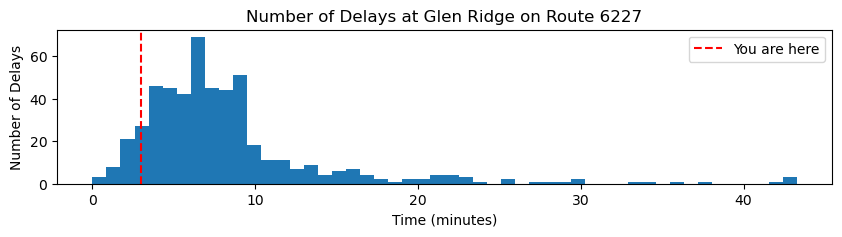

In [60]:
#make a calculator for a certain lateness

#get inputs for route, station, and lateness
train_id = input("What's your train route number?")
origin = input("What's your departure station?")
delay_time = int(input("Be honest, how late are you?"))

#filter a frame of that train approaching that station
train_frame = (df2[(df2['train_id'] == train_id)*(df2['to'] == origin)])

#find the same probability but just for this instance
prob = sum(train_frame['delay_minutes'] >= delay_time)/train_frame.shape[0]

#print it
print('You have a ' f"{prob:.2%}" ' chance of making the train.')


#make a histogram showing the delays with a semispecific bin
plt.figure(figsize=(10,2))
plt.hist(train_frame['delay_minutes'], bins = 50)
plt.xlabel('Time (minutes)')
plt.ylabel('Number of Delays')
plt.title(f'Number of Delays at {origin} on Route {train_id}')
#mark the user's lateness within the histogram to give them a false sense of security
plt.axvline(x=delay_time, color='red', linestyle='--', label=f'You are here')
plt.legend()






In [39]:
#get a list of stations
stations = df2['from'].unique()
#make a dictionary
station_counts = {}
#get a day value to normalize the data
days = len(df2['date'].unique())


#make a for loop that rewrites the dictionary {station: #average number of trains/day}
for station in stations:
    count = df2['to'].eq(station).sum()/days
    station_counts[station] = count

#make another dictionary
station_delays = {}
#use another for loop to replicate the first dictionary but with average delay time
for station in stations:
    filtered_df = df2[df2['from'] == station]
    average_delay = filtered_df['delay_minutes'].mean()
    station_delays[station] = average_delay

    
#generate lists for #trains/day and average delay time to make graphing easier
num_trains = list(station_counts.values())
average_delays = list(station_delays.values())



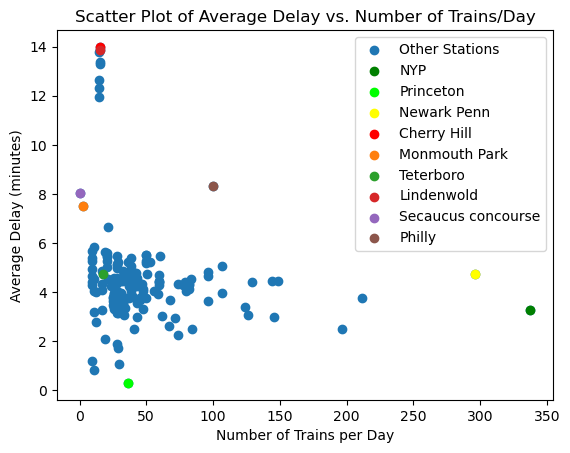

In [40]:
#make a scatter plot showing # of trains/day by delay time
plt.scatter(num_trains, average_delays, label='Other Stations')

plt.xlabel('Number of Trains per Day')
plt.ylabel('Average Delay (minutes)')
plt.title('Scatter Plot of Average Delay vs. Number of Trains/Day')
plt.scatter(337.6925925925926, 3.259734960749788, color='green', label='NYP')
plt.scatter(36.50617283950617, 0.2912856458183794, color='lime', label='Princeton')
plt.scatter(296.11358024691356, 4.736563771385051, color='yellow', label='Newark Penn')
plt.scatter(15.2567901234567, 13.991352559607403, color='red', label='Cherry Hill')
plt.scatter(2.493827160493827,7.49965850408124, label='Monmouth Park')
plt.scatter(17.55679012345679, 4.721426643106037, label='Teterboro')
plt.scatter(15.267901234567901, 13.876951037925808, label='Lindenwold')
plt.scatter(0.027160493827160494, 8.05087719298193, label='Secaucus concourse')
plt.scatter(100.1283950617284, 8.338435284467078, label = 'Philly')
plt.legend()




plt.show()

In [57]:
# station_rankings = {}

# for station in stations:
#     station_rankings[station] = station_delays[station
                                              
                                              
#                                 ]


station_rankings = {station: station_counts[station]/station_delays[station] for station in station_delays}

label = station_rankings.keys()
newrankings = {k: v for k, v in sorted(station_rankings.items(), key=lambda item: item[1], reverse=True)}
# newrankings = sorted(newrankings, key=newrankings.get, reverse=True)
print("{" + "\n".join("{!r}: {!r},".format(k, v) for k, v in newrankings.items()) + "}")

{'Princeton': 125.3277439639723,
'New York Penn Station': 103.59510716629495,
'Hoboken': 78.57349361177482,
'Newark Penn Station': 62.51654037380879,
'Secaucus Upper Lvl': 56.51273970966977,
'Trenton': 49.09908168155491,
'Princeton Junction': 41.23729308917686,
'Secaucus Lower Lvl': 36.632894312724225,
'Hamilton': 33.81385488427062,
'Newark Airport': 33.44668354967594,
'Long Branch': 33.10706634732791,
'Newark Broad Street': 32.44944694146766,
'Metropark': 29.359630579246645,
'Gladstone': 27.833872881402502,
'Summit': 27.043463335116382,
'New Brunswick': 26.480078139335205,
'Dover': 25.537032875547656,
'Waldwick': 24.43989004134036,
'Rahway': 21.139468759432084,
'Suffern': 20.681601253047862,
'Elizabeth': 20.67942760337851,
'Linden': 19.967451003237496,
'Edison': 19.813447491381822,
'Ridgewood': 19.74267199472647,
'Metuchen': 19.091684951591127,
'Maplewood': 19.054700366860622,
'Millburn': 18.924318928046553,
'South Orange': 18.4341914107635,
'Denville': 18.350267273537263,
'Short Hill

In [605]:

newrankings = {k: v for k, v in sorted(station_rankings.items(), key=lambda item: item[1])}
# print(newrankings)



{'New York Penn Station': 337.6925925925926, 'Secaucus Upper Lvl': 211.85185185185185, 'Newark Penn Station': 296.11358024691356, 'Newark Airport': 148.27037037037036, 'North Elizabeth': 50.29382716049383, 'Elizabeth': 96.44074074074074, 'Linden': 96.0037037037037, 'Rahway': 106.90246913580246, 'Metropark': 129.08271604938273, 'Metuchen': 82.01728395061728, 'Edison': 82.01728395061728, 'New Brunswick': 96.01481481481481, 'Jersey Avenue': 35.6641975308642, 'Princeton Junction': 125.84197530864198, 'Hamilton': 83.92716049382716, 'Bay Head': 28.132098765432097, 'Point Pleasant Beach': 28.132098765432097, 'Manasquan': 28.132098765432097, 'Spring Lake': 28.132098765432097, 'Belmar': 28.149382716049384, 'Bradley Beach': 28.149382716049384, 'Asbury Park': 28.149382716049384, 'Allenhurst': 28.149382716049384, 'Elberon': 28.149382716049384, 'Long Branch': 74.09876543209876, 'Little Silver': 50.05925925925926, 'Red Bank': 50.0641975308642, 'Middletown NJ': 50.065432098765434, 'Aberdeen-Matawan':

In [30]:
df3.shape
len(stations)

167